<a href="https://colab.research.google.com/github/webprogrammer77/CoPilot/blob/master/digit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ДОМАШНЕЕ ЗАДАНИЕ №1 июльский курс - 2020 PRO**

#LIGHT

**Импорт библиотек.**

In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

**Загрузка базы mnist.**

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

11493376/11490434 [==============================] - 0s 0us/step


**Создание нейронной сети.**

In [ ]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(400, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(800, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 800)               320800    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
Total params: 642,810
Trainable params: 642,810
Non-trainable params: 0
_________________________________________________________________
None


**Обучение нейронной сети.**

In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [ ]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.1261 - val_accuracy: 0.9758
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.1142 - val_accuracy: 0.9793
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.1018 - val_accuracy: 0.9821
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.1245 - val_accuracy: 0.9783
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.1196 - val_accuracy: 0.9792
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.1196 - val_accuracy: 0.9797
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.1334 - val_accuracy: 0.9772
Epoch 

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

**Проверка - Распознавание рукописных цифр.**

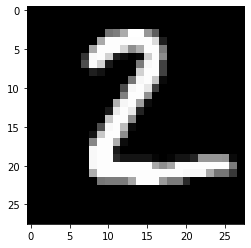

In [ ]:
n_rec = 1 #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [ ]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)

(784,)


In [ ]:
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массив примеров для распознавания
#Мы делаем массив из одного примера
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [ ]:
prediction = model.predict(x) #Распознаём наш пример
prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(prediction)

2


In [ ]:
print(y_test_org[n_rec]) #выводим правильный ответ, для сравнения

2


#PRO

##Распознование цифры сделанной в paint

**загрузка файла сделанного в paint изображения цифры**

In [ ]:
try:
  f = open('8.jpg')
  f.close()
  print('Файл уже загружен')
except IOError: 
  !wget 'http://rus-books.ru/9.jpg' #загружаем картинку в колаб


Файл уже загружен


**Подготовка цифры для распознания**

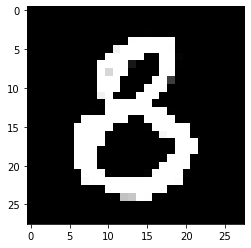

(1, 784)


In [ ]:
img_load = image.load_img('8.jpg', color_mode='grayscale', target_size=(28,28)) #загружаем картинку в переменную.
plt.imshow(img_load, cmap='Greys') #Отрисовка картинки
plt.show() # Вывод картинки
img_arr = image.img_to_array(img_load) #преобразуем изображение в numpy-массив.
img = img_arr.reshape(1,784) #Меняем формат входных картинок с 28х28 на 784х1
img = img.astype('float32') #преобразовываем img в тип float (цифры с плавающей точкой)
img = img / 255 #делим на 255, чтобы диапазон был от 0 до 1
img = 1 - img #инвертируем
print(img.shape)



**Распознание цифры**

In [ ]:
prediction = model.predict(img) #Распознаём наш пример
print(prediction)
prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(prediction)

[[6.0475139e-11 4.4096535e-11 5.6035683e-06 6.0358128e-05 3.6230723e-14
  3.1714101e-10 1.4482648e-11 3.6355523e-11 9.9993408e-01 6.9718701e-12]]
8


##Распознание цифры написанной на листе от руки

**Загрузка фото цифры сделанной от руки в колаб**

In [ ]:
try:
  f = open('4.jpg')
  f.close()
  print('Файл уже загружен')
except IOError: 
  !wget 'http://rus-books.ru/4.jpg' #загружаем картинку в колаб

Файл уже загружен


**Подготовка цифры для распознания**

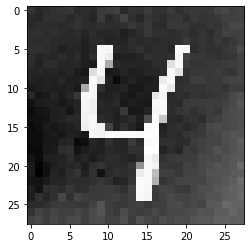

In [ ]:
img_load = image.load_img('4.jpg', color_mode='grayscale', target_size=(28,28)) #загружаем картинку в переменную.

plt.imshow(img_load, cmap='Greys') #Отрисовка картинки
plt.show() # Вывод картинки

**Дополнительная обработка изображения**

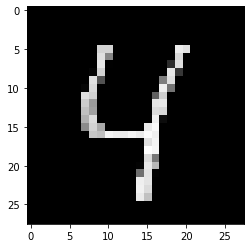

In [ ]:
def bright(source_name, result_name, brightness):
    source = Image.open(source_name)
    result = Image.new('RGB', source.size)
    for x in range(source.size[0]):
        for y in range(source.size[1]):
            r, g, b = source.getpixel((x, y))

            red = int(r * brightness)
            red = min(255, max(0, red))

            green = int(g * brightness)
            green = min(255, max(0, green))

            blue = int(b * brightness)
            blue = min(255, max(0, blue))

            result.putpixel((x, y), (red, green, blue))
    result.save(result_name, "JPEG")  
bright('4.jpg', '4-1.jpg', 5)

img_load1 = image.load_img('4-1.jpg', color_mode='grayscale', target_size=(28,28)) #загружаем картинку в переменную.
plt.imshow(img_load1, cmap='Greys') #Отрисовка картинки
plt.show() # Вывод картинки

In [ ]:
img_load = image.load_img('4-1.jpg', color_mode='grayscale', target_size=(28,28)) #загружаем картинку в переменную.
img_arr = image.img_to_array(img_load) #преобразуем изображение в numpy-массив.
img = img_arr.reshape(1,784) #Меняем формат входных картинок с 28х28 на 784х1
img = img.astype('float32') #преобразовываем img в тип float (цифры с плавающей точкой)
img = img / 255 #делим на 255, чтобы диапазон был от 0 до 1
img = 1 - img #инвертируем
print(img.shape)

(1, 784)


**Распознание цифры**

In [ ]:
prediction = model.predict(img) #Распознаём наш пример
prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(prediction)

4
